In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [29]:
housedf = pd.read_csv('NY-House-Dataset.csv')
housedf

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,Brokered by COMPASS,Co-op for sale,599000,1,1.000000,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879
4797,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1.000000,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152
4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1.000000,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398
4799,Brokered by E Realty International Corp,Condo for sale,598125,2,1.000000,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752


In [30]:
housedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [31]:
housedf.isna().sum()

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64

In [32]:
col = ['BROKERTITLE','TYPE','PROPERTYSQFT','STATE','LOCALITY','PRICE']
housedf = housedf[col]
housedf

,BROKERTITLE,TYPE,PROPERTYSQFT,STATE,LOCALITY,PRICE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,1400.000000,"New York, NY 10022",New York,315000
1,Brokered by Serhant,Condo for sale,17545.000000,"New York, NY 10019",New York,195000000
2,Brokered by Sowae Corp,House for sale,2015.000000,"Staten Island, NY 10312",New York,260000
3,Brokered by COMPASS,Condo for sale,445.000000,"Manhattan, NY 10022",New York,69000
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,14175.000000,"New York, NY 10065",New York,55000000
...,...,...,...,...,...,...
4796,Brokered by COMPASS,Co-op for sale,2184.207862,"Manhattan, NY 10075",New York County,599000
4797,Brokered by Mjr Real Estate Llc,Co-op for sale,2184.207862,"Rego Park, NY 11374",New York,245000
4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,2184.207862,"New York, NY 10011",New York,1275000
4799,Brokered by E Realty International Corp,Condo for sale,655.000000,"Elmhurst, NY 11373",Queens County,598125


In [33]:
housedf = pd.get_dummies(housedf,dtype='int')

In [34]:
housedf

,PROPERTYSQFT,PRICE,BROKERTITLE_Brokered by 1 Oak Real Estate Hub Inc,BROKERTITLE_Brokered by 5 Boro Realty Corp,BROKERTITLE_Brokered by A J Realty Of Queens Inc,BROKERTITLE_Brokered by A P Services Inc,BROKERTITLE_Brokered by AAA Young Shuen Realty Inc,"BROKERTITLE_Brokered by ABC REAL ESTATE SERVICES, INC.",BROKERTITLE_Brokered by ACCS - Access Property Group,BROKERTITLE_Brokered by ACG REALTY NY LLC,...,LOCALITY_Brooklyn,LOCALITY_Flatbush,LOCALITY_Kings County,LOCALITY_New York,LOCALITY_New York County,LOCALITY_Queens,LOCALITY_Queens County,LOCALITY_Richmond County,LOCALITY_The Bronx,LOCALITY_United States
0,1400.000000,315000,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,17545.000000,195000000,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2015.000000,260000,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,445.000000,69000,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,14175.000000,55000000,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,2184.207862,599000,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4797,2184.207862,245000,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4798,2184.207862,1275000,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4799,655.000000,598125,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [37]:
X = housedf.drop(columns=['PRICE'])
Y = housedf['PRICE']

In [38]:
X

,PROPERTYSQFT,BROKERTITLE_Brokered by 1 Oak Real Estate Hub Inc,BROKERTITLE_Brokered by 5 Boro Realty Corp,BROKERTITLE_Brokered by A J Realty Of Queens Inc,BROKERTITLE_Brokered by A P Services Inc,BROKERTITLE_Brokered by AAA Young Shuen Realty Inc,"BROKERTITLE_Brokered by ABC REAL ESTATE SERVICES, INC.",BROKERTITLE_Brokered by ACCS - Access Property Group,BROKERTITLE_Brokered by ACG REALTY NY LLC,BROKERTITLE_Brokered by ACKERMAN VLADA,...,LOCALITY_Brooklyn,LOCALITY_Flatbush,LOCALITY_Kings County,LOCALITY_New York,LOCALITY_New York County,LOCALITY_Queens,LOCALITY_Queens County,LOCALITY_Richmond County,LOCALITY_The Bronx,LOCALITY_United States
0,1400.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,17545.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2015.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,445.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,14175.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,2184.207862,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4797,2184.207862,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4798,2184.207862,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4799,655.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [39]:
Y

0          315000
1       195000000
2          260000
3           69000
4        55000000
          ...    
4796       599000
4797       245000
4798      1275000
4799       598125
4800       349000
Name: PRICE, Length: 4801, dtype: int64

In [40]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [41]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [42]:
model.score(X_train,Y_train)

0.993815118313219

In [43]:
Linear_accuracy = model.score(X_test,Y_test)
print(Linear_accuracy)

-85195396041877.23


In [44]:
model_las = Lasso(alpha = 0.1,max_iter = 1,tol = 0.001)
model_las.fit(X_train,Y_train)

C:\Users\Clarina Jones\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.803e+16, tolerance: 4.667e+15
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1, max_iter=1, tol=0.001)

In [45]:
model_las.score(X_train,Y_train)

0.9922727618624366

In [46]:
Lasso_accuracy = model_las.score(X_test,Y_test)
print(Lasso_accuracy)

0.18974974033414338


In [47]:
model_rid = Ridge(alpha = 0.1,max_iter = 1,tol = 0.001)
model_rid.fit(X_train,Y_train)

Ridge(alpha=0.1, max_iter=1, tol=0.001)

In [48]:
model_rid.score(X_train,Y_train)

0.9915820642331205

In [49]:
Ridge_accuracy = model_rid.score(X_test,Y_test)
print(Ridge_accuracy)

0.22714841816364806


In [50]:
model.score(X_train,Y_train)

0.993815118313219

In [51]:
Decision_tree_accuracy = model.score(X_test,Y_test)
print(Decision_tree_accuracy)

-85195396041877.23


In [52]:
models = ['Linear Regression','Lasso','Ridge','Decision Tree Classifier']
accuracy_scores = [Linear_accuracy,Lasso_accuracy,Ridge_accuracy,Decision_tree_accuracy]

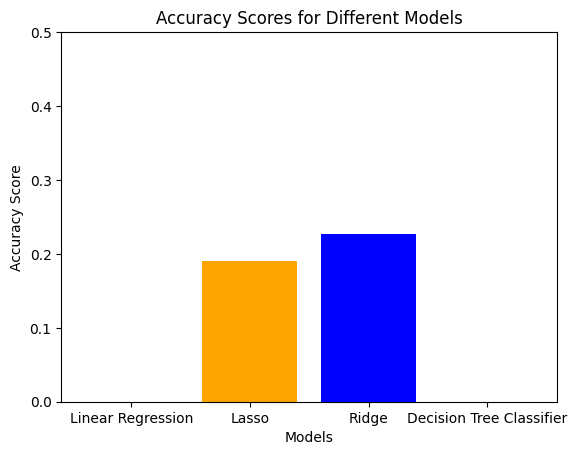

In [55]:
plt.bar(models, accuracy_scores, color=['red', 'orange', 'blue','pink'])
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Different Models')
plt.ylim(-,0.5)  
plt.show()